## Code de Steven

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
[[  0. 159.  65. ... 107.  93.  96.]
 [159.   0. 148. ... 176. 186.  81.]
 [ 65. 148.   0. ... 159. 141. 198.]
 ...
 [107. 176. 159. ...   0.   1. 184.]
 [ 93. 186. 141. ...   1.   0. 175.]
 [ 96.  81. 198. ... 184. 175.   0.]]

Temps total d'exécution: 0.008432865142822266 secondes
[0, 2, 1, 3, 0]
[0, 3, 2, 1, 0]
[0, 1, 3, 2, 0]

Chemin avec l'algorithme du plus proche voisin : [0, 42, 86, 99, 80, 40, 53, 9, 65, 21, 32, 36, 31, 15, 61, 8, 24, 16, 83, 66, 56, 10, 63, 14, 47, 46, 3, 87, 74, 13, 26, 71, 23, 78, 52, 18, 96, 17, 45, 89, 81, 22, 5, 97, 98, 76, 94, 4, 85, 51, 67, 48, 29, 11, 37, 27, 84, 7, 30, 41, 57, 59, 49, 28, 34, 35, 43, 58, 68, 93, 73, 50, 38, 33, 77, 62, 82, 20, 75, 54, 55, 1, 60, 88, 70, 25, 2, 12, 19, 6, 69, 39, 72, 95, 64, 91, 79, 92, 44, 90, 0]

Valeur de ce chemin : 733.0
La valeur du chemin initial est : 25294

Text(0.5, 1.0, '\nExploration de la zone de recherche par notre algorithme\n')

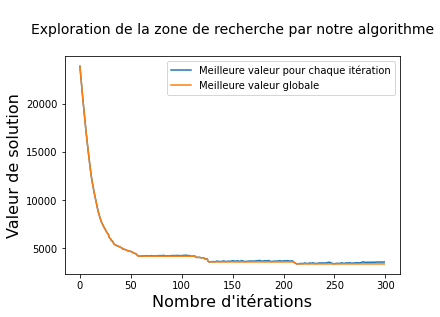

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
import timeit
import random

nb_villes=100 #Nombre de villes à générer
tempsMax=200 #Temps (Distance) max séparant 2 villes

random.seed(5)

def generer_matrice_adjacence(taille,typeDeGraphe):
    matrice = np.empty((taille, taille))              
    if(typeDeGraphe == 'Complete'):               
        for i in range(taille):
            for j in range(i,taille):
                valeur = 1 if i!=j else 0 
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    else:
         for i in range(taille):
            for j in range(i,taille):
                valeur = random.randint(0, 1)  if i!=j else 0
                matrice[i][j] = valeur
                matrice[i][j] = valeur
    return matrice
    

matriceAdjacence = generer_matrice_adjacence(nb_villes, "Complete")
print(matriceAdjacence)

def generer_matrice_pondere(matrice):
    for i in range(len(matrice)):
        for j in range(i,len(matrice)):
            if(matrice[i][j] != 0):
                valeur = random.randint(0, tempsMax)
                matrice[i][j] = valeur
                matrice[j][i] = valeur
    return matrice



start = time.time() #Commence le calcul du temps d'exécution
graphe = generer_matrice_pondere(matriceAdjacence) ##Génère une matrice pour n villes et avec un temps maximum
print(graphe)
stop = time.time() #Stop le calcul du temps d'exécution

print("\nTemps total d'exécution: " + str(stop-start) + " secondes")

#Génère les voisins valides d'une solution
def getNeighbors(path, graphe):
    startNode=path.pop(0) #Réinitialisation du point de départ
    path.pop(len(path)-1) #Réinitialisation du point d'arrivé
    index=0
    for i in range(len(path)):
        for j in range(1,len(path)-i):
            neighborPath=path.copy() #On fait une copie du chemin fourni
            neighborPath[i], neighborPath[i+j] = neighborPath[i+j], neighborPath[i] #Swap des voisins
            neighborPath.insert(0,startNode) #Ajout du point de départ
            neighborPath.append(startNode) #Ajout du point d'arrivé
            yield(neighborPath)

# Test de la fonction
for voisin in getNeighbors([0,1,2,3,0],graphe):
    print(voisin)


#Renvoi le temps total d'un chemin
def getPathTime(path, graphe):
    time=0 #Initialisation du temps
    for i in range(len(path)-1):
        time+=graphe[path[i]][path[i+1]] #On ajoute le temps 
    return time

#Donne l'indice de la ville de plus proche de la ville actuelle non-visitée
def nextCity(currentCityPosition,visitedCitiesPosition,graphe) :
    mini = 1000000000
    minimumPosition = -1
    for i in range(len(graphe)) :
        if visitedCitiesPosition[i] == False : #Index de la ville dans la liste des villes visitées
            if graphe[currentCityPosition][i] < mini : #Si l'index de la ville actuelle est inférieur à mini
                mini = graphe[currentCityPosition][i] #On récupère l'index de la ville actuelle
                minimumPosition = i #On récupère le numéro dans graphe de la ville
    return minimumPosition


#Donne le chemin à suivre du voyageur de commerce sous forme de tableau d'indice
def nearestNeighbor(startCity,graphe):
    visitedCitiesPosition = [False] * len(graphe) #Pas de villes visitées au début
    path = [0]* (len(graphe)) #Le chemin est vide

    currentCityPosition = startCity #Indice de la ville de départ
    visitedCitiesPosition[currentCityPosition] = True # On dit que la ville est visitée.
    path[0] = currentCityPosition

    for i in range(1,len(graphe)) :
        indiceNextCity= nextCity(currentCityPosition,visitedCitiesPosition,graphe)
        path[i] = indiceNextCity
        currentCityPosition = indiceNextCity
        visitedCitiesPosition[currentCityPosition] = True # La ville est visitée elle ne peut plus être prise.
    path.append(path[0])
    return path

reNearestNeighbor=nearestNeighbor(0,graphe)

print("\nChemin avec l'algorithme du plus proche voisin : " + str(reNearestNeighbor))
print("")
print("Valeur de ce chemin : " + str(getPathTime(reNearestNeighbor,graphe)))
def tabuSearch(startNode, tabuLength, iterMax, graphe):
    """
    1. On part d'un element de notre ensemble de recherche qu'on declare element courant
    2. On considere le voisinage de l'element courant et on choisit le  meilleur d'entre
       eux comme nouvel element courant, parmi ceux absents de la liste tabou, et on l'ajoute
       a la liste tabou
    3. On boucle jusqu'a condition de sortie.
    """


    nbIter = 0
    tabuList = list()

    initialElement=[i for i in range(len(graphe))]
    initialElement.remove(startNode)
    initialElement.append(startNode)
    initialElement.insert(0,startNode)
        
    # variables solutions pour la recherche du voisin optimal non tabou
    currentElement = initialElement
    bestNeighbor=currentElement
    bestNeighborGlobal=currentElement

    # variables valeurs pour la recherche du voisin optimal non tabou
    bestCost=100000
    bestCostGlobal=100000

    # variables pour l'affichage
    nbTabou=0
    bestGlobalFound=0
    
    # liste des solutions courantes et des meilleures trouvées, pour afficher la trajectoire
    paths=list()
    bestPaths=list()
    
    while (nbIter<iterMax):
        nbIter += 1       
        bestCost=100000
        # on parcours tous les voisins de la solution courante
        for neighbor in getNeighbors(currentElement,graphe):
            if getPathTime(neighbor,graphe) < bestCost:
                if neighbor not in tabuList:
                    bestCost = getPathTime(neighbor,graphe)
                    bestNeighbor = neighbor         
        # on met a jour la meilleure solution rencontree depuis le debut
        if bestCost<bestCostGlobal:
            bestGlobalFound+=1
            bestNeighborGlobal=bestNeighbor
            bestCostGlobal=bestCost
            #print("Meilleur global trouvé ! : " + str(bestNeighborGlobal) + " avec une valeur de :" + str(bestCostGlobal)
        bestPaths.append(bestCostGlobal)
        # on passe au meilleur voisin non tabou trouve     
        currentElement=bestNeighbor.copy()
        paths.append(bestCost)
        
        # on met a jour la liste tabou
        tabuList.append(bestNeighbor)

        # on supprime la solution la plus ancienne si la liste tabou à atteint sa taille maximale
        if len(tabuList) > tabuLength:
            del tabuList[0]

    # On insère à l'élément initiale la ville d'origine
    initialElement.insert(0,startNode)
    initialElement.append(startNode)
    return bestNeighborGlobal, paths, bestPaths, initialElement


#------------------ Execution de l'algorithme ---------------------

# Paramètres de génération du graphe
nbVilles=100
tempsMax=500

graphe = generer_matrice_pondere(matriceAdjacence)

# Modifier ce paramètre pour modifier le nombre d'itération maximum de la recherche tabou
iterMaximum=300
# Modifier ce paramètre pour modifier la taille maximum de la liste tabou
tabuMax=len(graphe)
# Modifier ce paramètre pour activer ou non l'utilisation du plus proche voisin comme chemin initial
useNearestNeighbor=True
# Modifier ce paramètre pour changer la ville de départ
departureCity=0

startTime = time.time()
sol, paths, bestPaths, initialPath=tabuSearch(startNode=departureCity, tabuLength=tabuMax, iterMax=iterMaximum, graphe=graphe)
execTime = (time.time() - startTime)

print("La valeur du chemin initial est :",str(getPathTime(initialPath,graphe)))
print("\n---------------------------------------------")
#print("\nLe meilleur chemin trouvé est : " + str(resNearestNeighbor(sol)))
print("\nSa valeur est de : " + str(getPathTime(sol,graphe)) + " mn, soit " + str("{:.2f}".format(getPathTime(sol,graphe)/60)) + " h")
print("\nTemps d'execution : " + str(execTime) + " secondes\n\n")

# Affichage des résultats sur le graphique
plt.xlabel("Nombre d'itérations", fontsize=16)
plt.ylabel("Valeur de solution", fontsize=16)

res = plt.plot(range(iterMaximum), paths,label='Meilleure valeur pour chaque itération')
res = plt.plot(range(iterMaximum), bestPaths,label='Meilleure valeur globale')

plt.legend()
font2 = {'size':14}
plt.title("\nExploration de la zone de recherche par notre algorithme\n", loc = 'center',fontdict = font2)

# Borne

In [10]:
from pulp import *

def borne_superieure():
    objets = range(len(graphe))

    # variables
    x = LpVariable.dicts('objet', objets, 0, 1)
    
    # probleme
    prob = LpProblem("opti", LpMinimize)

    # fonction objective
    cost = lpSum(graphe[sol[i][j]][sol[i][j+1]] for i in sol for j in range(len(sol[i])-1))
    prob += cost

    prob.solve()
    return value(prob.objective) if (LpStatus[prob.status] == "Optimal") else None

borne = borne_superieure()
if borne is not None:
    print("borne supérieure : ", borne)
print("valeur de la solution :", str(getPathTime(reNearestNeighbor,graphe)))

TypeError: object of type 'int' has no len()

## Qualité statistique des solutions

In [23]:
from ipywidgets import IntProgress
from IPython.display import display

random.seed(5)
bornes = deque(())

iter_max = 50
taille_tabou = 200

# paramètres du test
nb_tests = 200

# on affiche la barre de progression
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for _ in range(nb_tests):

    valeur_objets = recherche_tabou(sol,taille__tabou,iter_max)
    borne = borne_superieure()

    solfin = recherche_tabou(sol, taille_tabou, iter_max)
    val = weightSol(solfin)
    distance = val*100/borne
    bornes.append(distance)
    bar.value += 1
    #À COMPLÉTER

# on cache la barre de progression
bar.close()

IntProgress(value=0, layout=Layout(width='100%'), max=200)

TypeError: tuple indices must be integers or slices, not dict

In [15]:
plt.hist(bornes, edgecolor = "black")                        
plt.xlabel("distance à la borne (pourcentage)")               
plt.ylabel("nombre d'intances")                               
plt.title("Distribution des distances à la borne supérieure") 

NameError: name 'bornes' is not defined

## Histogramme détaillé

In [14]:
plt.hist(bornes, bins=50, edgecolor = "black");

NameError: name 'bornes' is not defined

## Optimisation des paramètres de l'algorithme

In [24]:
import statistics
import numpy as np
random.seed(5)

# paramètres du test
tabou_min = 1
tabou_max = 20
nb_objets = 200

nb_test  = 100
iter_max = 20

# on affiche la barre de progression
nb_steps_bar = (tabou_max-tabou_min)*nb_test #
bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
display(bar)

# pour stocker les résultats
moyennes   = []
deviations = []

random.seed(5)

# cette fois on boucle sur la taille de la liste tabou
for taille_tabou in range(tabou_min, tabou_max):
    bornes = deque(())
    for _ in range(nb_test):

        borne = borne_superieure()

        solfin = recherche_tabou(sol, taille_tabou, iter_max)
        val = weightSol(solfin)
        distance = val*100/borne
        bornes.append(distance)
        bar.value += 1
    moyennes.append(statistics.fmean(bornes))              
    deviations.append(np.std(bornes))


# on cache la barre de progression
bar.close()

# affichage de la courbe de moyenne
plt.plot(range(tabou_min, tabou_max), moyennes)

# affichage de la bande d'écart-type
plt.fill_between(range(tabou_min, tabou_max),
                 np.subtract(moyennes, deviations), # borne haute
                 np.add(moyennes, deviations),      # borne basse
                 alpha=.1)                          # transparence
plt.xlabel("taille de la liste tabou")
plt.ylabel("distance à la borne")
plt.title("Impact de la taille de la liste tabou sur la qualité des solutions")
plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=1900)

TypeError: tuple indices must be integers or slices, not dict

## Impact des paramètres d'instance

In [26]:
random.seed(5)

# paramètres du test
objets_min   = 20
objets_max   = 220
objets_steps = 20
nb_test      = 200

taille_tabou = 5
iter_max     = taille_tabou*2

nb_steps_bar = (tabou_max-tabou_min/objets_steps)*nb_test

# on affiche la barre de progression
bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
display(bar)

# pour stocker les résultats
moyennes   = []
deviations = []

# on fait varier le nombre d'objets dans la génération aléatoire d'instances
for nb_objets in range(objets_min, objets_max, objets_steps): 
    bornes = deque(())                                        
    for _ in range(nb_test):                                                                       
        borne = borne_superieure()                            
                                                            
        solfin = recherche_tabou(sol, taille_tabou, iter_max)
        val = weightSol(solfin)
        distance = val*100/borne
        bornes.append(distance)
        bar.value += 1                              
    moyennes.append(statistics.fmean(bornes))                
    deviations.append(np.std(bornes)) 


# on cache la barre de progression
bar.close()

# affichage de la courbe de moyenne
plt.plot(range(objets_min, objets_max, objets_steps), moyennes)

# affichage de la bande d'écart-type
plt.fill_between(range(objets_min, objets_max, objets_steps),
                 np.subtract(moyennes, deviations), # borne haute
                 np.add(moyennes, deviations),      # borne basse
                 alpha=.1)                          # transparence
plt.ylim(top=100)
plt.xlabel("nombre d'objets disponibles")
plt.ylabel("distance à la borne")
plt.title("Impact du nombre d'objets sur la qualité des solutions")
plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=3990)

TypeError: tuple indices must be integers or slices, not dict